# Trabalho 1 - Backpropagation

Neste trabalho, você deverá implementar o método da retropropagação (backpropagation) para o cálculo do gradiente da função de custo com relação aos pesos de uma rede neural multi-camadas (número de camadas ocultas no ≥ 2). Se implementado em Python, use a biblioteca numpy (np.dot, np.array, etc.)

___
### Estrutura do projeto
Os códigos implementados e utilizados no presente trabalho foram desenvolvidos exclusivamente por minha autoria e estão acessíveis por meio do repositório hospedado na plataforma https://github.com/santoguiia/machine-learning.

Este repositório contém os códigos e arquivos necessários para a compreensão e reprodução das análises e experimentos conduzidos no âmbito deste projeto. A utilização deste recurso proporciona transparência e replicabilidade dos resultados obtidos, permitindo a validação das conclusões e a verificação da metodologia empregada.

A disposição dos códigos neste repositório segue uma estrutura organizada e documentada, facilitando a navegação e compreensão por parte de outros pesquisadores e interessados no tema abordado. Além disso, eventuais atualizações ou correções podem ser incorporadas de forma transparente e rastreável, contribuindo para a melhoria contínua do trabalho desenvolvido.
___

## A) Crie as estruturas de dados para guardar os pesos que definem uma arquitetura de rede neural multi-camadas. Inicialize a rede neural aleatoriamente.

Este código implementa uma Rede Neural Artificial com múltiplas camadas ocultas. A rede é inicializada com pesos aleatórios. Durante o treinamento, a rede usa a propagação direta para gerar previsões, e a retropropagação para calcular o erro dessas previsões. O erro é então usado para atualizar os pesos da rede através do método do gradiente descendente. Este processo é repetido por um número especificado de épocas, ou iterações, para otimizar os pesos da rede para a tarefa de previsão. A perda (ou erro) é impressa a cada 100 épocas para monitorar o progresso do treinamento.

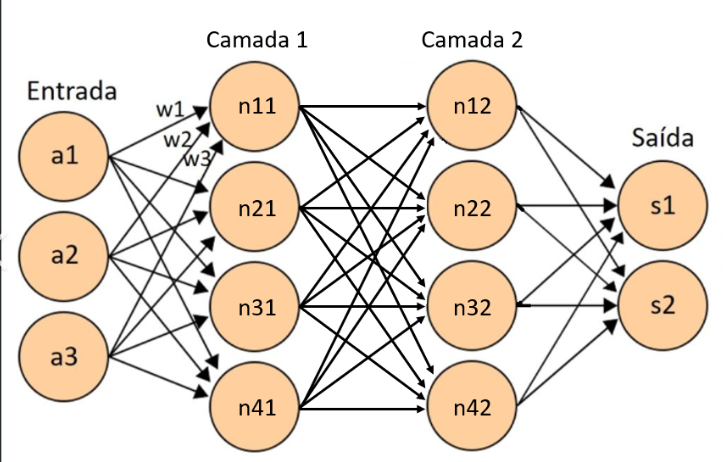

In [1]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        
        # Inicialização aleatória dos pesos
        self.weights = []
        sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(sizes)-1):
            self.weights.append(np.random.randn(sizes[i], sizes[i+1]))

In [2]:
#Hiperparâmetros: o lr deve ser abaixo de 0.0001 para não resultar em Exploding Gradients
# Epochs = 250
# lr = 1e-5
# momentum = 0.9 
# wd = 0.0001
# optimizer = optim.SGD(model.parameters(), lr=lr,momentum = momentum, weight_decay = wd)
# scheduler

___

##  B) Implemente o algoritmo da retropropagação para o cálculo do gradiente, a derivada parcial da função de custo com relação aos pesos da rede.

Abaixo podemos o funcionamento das funções:

1. **Inicialização (`__init__`)**: Esta função inicializa a rede neural com um tamanho de entrada especificado, tamanhos de camadas ocultas e um tamanho de saída. Os pesos entre as camadas são inicializados aleatoriamente.

2. **Propagação Direta (`forward`)**: Esta função realiza a propagação direta, que é o processo de passar os dados de entrada através da rede neural para obter uma saída. A função de ativação usada aqui é a tangente hiperbólica (`tanh`).

3. **Retropropagação (`backward`)**: Esta função realiza a retropropagação, que é o processo de ajustar os pesos da rede com base no erro da saída. O erro é calculado como a diferença entre a saída da rede e a saída desejada.

4. **Atualização (`update`)**: Esta função atualiza os pesos da rede usando o gradiente descendente, que é um algoritmo de otimização usado para minimizar o erro.

5. **Treinamento (`train`)**: Esta função treina a rede neural usando os dados de entrada e saída fornecidos. Ela realiza a propagação direta, retropropagação e atualização dos pesos para um número especificado de épocas. A taxa de aprendizado também pode ser especificada. A função também imprime a perda (média do erro quadrático) a cada 100 épocas.

In [3]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        
        # Inicialização aleatória dos pesos
        self.weights = []
        sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(sizes)-1): # Inicialização dos pesos da rede
            self.weights.append(np.random.randn(sizes[i], sizes[i+1]))
    
    def forward(self, X): # Forward propagation
        ''' 
        Calcula a saída da rede para uma entrada X
        Dados de entrada são passados pela rede neural, até que uma saída predita seja gerada.
        '''
        activations = [X]
        for w in self.weights:
            activations.append(np.tanh(np.dot(activations[-1], w))) # activation with tanh
            # activations.append(1 / (1 + np.exp(-np.dot(activations[-1], w)))) # activation with sigmoid
        return activations
    
    def backward(self, X, y, activations): # Backpropagation
        ''' 
        Calcular os gradientes dos pesos da rede em relação à função de custo
        É utilizado para ajustar os pesos das conexões entre os neurônios de uma rede neural, de modo a minimizar uma função de erro 
        '''
        deltas = [None] * len(self.weights) # Inicialização dos gradientes dos pesos da rede
        deltas[-1] = activations[-1] - y # Gradiente da função de perda (erro quadrático)
        for i in range(len(deltas)-2, -1, -1):  
            # Função de ativação
            deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * (1 - np.power(activations[i+1], 2)) # Derivada da tangente hiperbólica
            # deltas[i] = deltas[i+1] * activations[i+1] * (1 - activations[i+1]) # Derivada da sigmoid
        return deltas
    
    def update(self, X, activations, deltas, learning_rate): # Atualização dos pesos usando o gradiente descendente
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * np.dot(activations[i].T, deltas[i]) / len(X)
    
    def train(self, X, y, epochs, learning_rate=0.01):
        for epoch in range(epochs):
            activations = self.forward(X)
            deltas = self.backward(X, y, activations)
            self.update(X, activations, deltas, learning_rate)
            if epoch % 100 == 0:
                loss = np.mean(np.square(activations[-1] - y))
                print(f"Epoch {epoch}: Loss {loss}")

Este código carrega um conjunto de dados de um arquivo chamado 'classification2.txt', normaliza os dados, inicializa uma Rede Neural Artificial e, em seguida, treina a rede neural nos dados carregados por 10.000 épocas com uma taxa de aprendizado de 0,01. A rede neural é treinada para prever a última coluna do conjunto de dados a partir das outras colunas.

In [4]:
# Carregar os dados
data = np.genfromtxt('classification2.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

# Normalizar os dados
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Inicializar a rede neural
input_size = X.shape[1]
hidden_sizes = [4, 4]  # Número de neurônios em cada camada oculta
output_size = 1
nn = NeuralNetwork(input_size=input_size, hidden_sizes=[32], output_size=output_size) # Hidden layers: 32 neurons

# Treinar a rede neural
nn.train(X, y[:, None], epochs=10000, learning_rate=0.01)


Epoch 0: Loss 1.6032913472465753
Epoch 100: Loss 0.8026420931080315
Epoch 200: Loss 0.6532987119612595
Epoch 300: Loss 0.5888092945025375
Epoch 400: Loss 0.5536278672388932
Epoch 500: Loss 0.5292142660832037
Epoch 600: Loss 0.5108434388334128
Epoch 700: Loss 0.49678820437042054
Epoch 800: Loss 0.48597692956438093
Epoch 900: Loss 0.477615470052057
Epoch 1000: Loss 0.4711069306596513
Epoch 1100: Loss 0.4660061161183562
Epoch 1200: Loss 0.46198178169621634
Epoch 1300: Loss 0.4587865427755156
Epoch 1400: Loss 0.4562342845512636
Epoch 1500: Loss 0.454183762082893
Epoch 1600: Loss 0.4525268476642117
Epoch 1700: Loss 0.4511801080384612
Epoch 1800: Loss 0.45007872180226927
Epoch 1900: Loss 0.4491720363658951
Epoch 2000: Loss 0.4484202811576938
Epoch 2100: Loss 0.44779210600441705
Epoch 2200: Loss 0.4472627168781118
Epoch 2300: Loss 0.4468124504467747
Epoch 2400: Loss 0.4464256753794944
Epoch 2500: Loss 0.44608993991316837
Epoch 2600: Loss 0.44579530692049285
Epoch 2700: Loss 0.4455338329506704

___ 

## C) Valide o algoritmo do cálculo do gradiente, realizando uma aproximação numérica do mesmo. Verifique se os cálculos batem um com o outro.

Este código gera um gráfico que visualiza a fronteira de decisão de uma rede neural treinada. Ele faz isso ao calcular a saída da rede neural para uma grade de pontos no espaço de entrada e, em seguida, traça um contorno onde a saída da rede neural é zero (a fronteira de decisão). Além disso, o código também plota os pontos de dados de treinamento, com cores diferentes para classes diferentes. A legenda "Accepted" representa os pontos de dados onde y é 1 e "Rejected" onde y é 0.

In [5]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        
        # Inicialização aleatória dos pesos
        self.weights = []
        sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(sizes)-1):
            self.weights.append(np.random.randn(sizes[i], sizes[i+1]))
    
    def forward(self, X): # Forward propagation
        ''' 
        Calcula a saída da rede para uma entrada X
        '''
        activations = [X]
        for w in self.weights:
            activations.append(np.tanh(np.dot(activations[-1], w)))
        return activations
    
    def backward(self, X, y, activations): # Backpropagation
        ''' 
        Calcula os gradientes dos pesos da rede
        '''
        deltas = [None] * len(self.weights) # Inicialização dos gradientes
        deltas[-1] = activations[-1] - y # Gradiente da função de perda
        for i in range(len(deltas)-2, -1, -1):
            # Função de ativação
            # deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * (1 - np.power(activations[i+1], 2)) # Derivada da tangente hiperbólica
            deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * (1 - np.power(activations[i+1], 2)) # Derivada da tangente hiperbólica
        return deltas
    
    def update(self, X, activations, deltas, learning_rate): # Atualização dos pesos usando o gradiente descendente
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * np.dot(activations[i].T, deltas[i]) / len(X)

############################################################################################################
    
    def compute_gradient_numerically(self, X, y, epsilon=1e-5): # Cálculo do gradiente numericamente
        gradient_numerical = []
        for layer, weights in enumerate(self.weights):
            gradient_layer = np.zeros_like(weights)
            for i in range(weights.shape[0]):
                for j in range(weights.shape[1]):
                    weights[i, j] += epsilon
                    activations = self.forward(X)
                    loss_plus = np.mean(np.square(activations[-1] - y))
                    weights[i, j] -= 2 * epsilon
                    activations = self.forward(X)
                    loss_minus = np.mean(np.square(activations[-1] - y))
                    weights[i, j] += epsilon
                    gradient_layer[i, j] = (loss_plus - loss_minus) / (2 * epsilon)
            gradient_numerical.append(gradient_layer)
        return gradient_numerical
    
############################################################################################################

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            activations = self.forward(X)
            deltas = self.backward(X, y, activations)
            self.update(X, activations, deltas, learning_rate)
            if epoch % 100 == 0:
                loss = np.mean(np.square(activations[-1] - y))
                print(f"Epoch {epoch}: Loss {loss}")

# Carregar os dados
data = np.genfromtxt('classification2.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

# Normalizar os dados
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Inicializar a rede neural
input_size = X.shape[1]
hidden_sizes = [4, 4]  # Número de neurônios em cada camada oculta
output_size = 1
nn = NeuralNetwork(input_size=input_size, hidden_sizes=hidden_sizes, output_size=output_size)

############################################################################################################

# Treinar a rede neural
nn.train(X, y[:, None], epochs=10000, learning_rate=0.01)

# Calcular o gradiente numericamente
gradient_numerical = nn.compute_gradient_numerically(X, y[:, None])

# Imprimir o gradiente calculado numericamente
for layer, gradient in enumerate(gradient_numerical):
    print(f"Layer {layer+1} gradient (numerical):\n {gradient}")

# Imprimir o gradiente calculado pelo backpropagation
for layer, gradient in enumerate(nn.backward(X, y[:, None], nn.forward(X))):
    print(f"Layer {layer+1} gradient (backpropagation):\n {gradient}")

############################################################################################################

# Implementar a função de custo
def loss(self, X, y):
    activations = self.forward(X)
    return np.mean(np.square(activations[-1] - y))
print(loss(nn, X, y[:, None]))




Epoch 0: Loss 0.731527232731768
Epoch 100: Loss 0.4890074681387252
Epoch 200: Loss 0.4870823515131396
Epoch 300: Loss 0.4864403982798587
Epoch 400: Loss 0.4860370779986658
Epoch 500: Loss 0.4857043843723663
Epoch 600: Loss 0.4854048193340942
Epoch 700: Loss 0.485127523587092
Epoch 800: Loss 0.48486752987013787
Epoch 900: Loss 0.4846214313575401
Epoch 1000: Loss 0.4843864150256822
Epoch 1100: Loss 0.4841600066970872
Epoch 1200: Loss 0.4839399733881343
Epoch 1300: Loss 0.4837242640496588
Epoch 1400: Loss 0.48351096226632945
Epoch 1500: Loss 0.4832982446816326
Epoch 1600: Loss 0.48308434357815455
Epoch 1700: Loss 0.4828675133295003
Epoch 1800: Loss 0.4826460010467028
Epoch 1900: Loss 0.48241802230708997
Epoch 2000: Loss 0.48218174354770804
Epoch 2100: Loss 0.48193527356892224
Epoch 2200: Loss 0.4816766675909574
Epoch 2300: Loss 0.4814039483001171
Epoch 2400: Loss 0.4811151490191584
Epoch 2500: Loss 0.4808083840294219
Epoch 2600: Loss 0.4804819494216951
Epoch 2700: Loss 0.4801344538014242


___

## D) Dado o gradiente já calculado, implemente o método do descenso do gradiente para o treinamento da rede neural, ou seja, o processo de ajuste dos pesos.

Este código realiza o treinamento de uma rede neural para classificação usando o `MLPClassifier` do `scikit-learn`. Ele divide os dados em conjuntos de treinamento e validação, depois varia os hiperparâmetros da rede neural, como o tamanho das camadas ocultas e a taxa de aprendizado, para encontrar o melhor modelo com base na precisão nos dados de validação. Finalmente, ele treina o melhor modelo encontrado com todos os dados de treinamento e plota a fronteira de decisão para visualização.

Este código realiza as seguintes tarefas:

1. **Carrega dados** de um arquivo chamado 'classification2.txt' e os divide em conjuntos de treinamento e validação.
2. **Treina e avalia** um classificador de rede neural (MLPClassifier) com diferentes tamanhos de camadas ocultas e taxas de aprendizado. A precisão do modelo em dados de validação é calculada para cada combinação de hiperparâmetros.
3. **Seleciona o melhor modelo** com base na maior precisão obtida nos dados de validação.
4. **Treina o melhor modelo** novamente com todos os dados de treinamento.
5. **Plota a fronteira de decisão** do melhor modelo, juntamente com os pontos de dados de treinamento.

Iteration 1, loss = 0.68239917
Iteration 2, loss = 0.68234019
Iteration 3, loss = 0.68225494
Iteration 4, loss = 0.68214904
Iteration 5, loss = 0.68202281
Iteration 6, loss = 0.68187902
Iteration 7, loss = 0.68172003
Iteration 8, loss = 0.68154868
Iteration 9, loss = 0.68136730
Iteration 10, loss = 0.68117681
Iteration 11, loss = 0.68097659
Iteration 12, loss = 0.68076607
Iteration 13, loss = 0.68054857
Iteration 14, loss = 0.68032495
Iteration 15, loss = 0.68009509
Iteration 16, loss = 0.67985983
Iteration 17, loss = 0.67961804
Iteration 18, loss = 0.67937305
Iteration 19, loss = 0.67912478
Iteration 20, loss = 0.67887180
Iteration 21, loss = 0.67861433
Iteration 22, loss = 0.67835675
Iteration 23, loss = 0.67810241
Iteration 24, loss = 0.67784856
Iteration 25, loss = 0.67759498
Iteration 26, loss = 0.67733959
Iteration 27, loss = 0.67707800
Iteration 28, loss = 0.67681361
Iteration 29, loss = 0.67654781
Iteration 30, loss = 0.67628265
Iteration 31, loss = 0.67602205
Iteration 32, los

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 126, loss = 0.30889346
Iteration 127, loss = 0.30855641
Iteration 128, loss = 0.30837354
Iteration 129, loss = 0.30853863
Iteration 130, loss = 0.30826378
Iteration 131, loss = 0.30834647
Iteration 132, loss = 0.30837632
Iteration 133, loss = 0.30799908
Iteration 134, loss = 0.30812639
Iteration 135, loss = 0.30793463
Iteration 136, loss = 0.30821911
Iteration 137, loss = 0.30821770
Iteration 138, loss = 0.30828393
Iteration 139, loss = 0.30808785
Iteration 140, loss = 0.30777013
Iteration 141, loss = 0.30808118
Iteration 142, loss = 0.30758642
Iteration 143, loss = 0.30796027
Iteration 144, loss = 0.30776858
Iteration 145, loss = 0.30770923
Iteration 146, loss = 0.30783676
Iteration 147, loss = 0.30752399
Iteration 148, loss = 0.30788896
Iteration 149, loss = 0.30790195
Iteration 150, loss = 0.30764347
Iteration 151, loss = 0.30746097
Iteration 152, loss = 0.30762441
Iteration 153, loss = 0.30741123
Training loss did not improve more than tol=0.000100 for 10 consecutive epoc

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 149, loss = 0.40620750
Iteration 150, loss = 0.40491450
Iteration 151, loss = 0.40363561
Iteration 152, loss = 0.40237704
Iteration 153, loss = 0.40113709
Iteration 154, loss = 0.39990477
Iteration 155, loss = 0.39868186
Iteration 156, loss = 0.39747538
Iteration 157, loss = 0.39630612
Iteration 158, loss = 0.39516056
Iteration 159, loss = 0.39402727
Iteration 160, loss = 0.39291179
Iteration 161, loss = 0.39180795
Iteration 162, loss = 0.39072756
Iteration 163, loss = 0.38966145
Iteration 164, loss = 0.38860534
Iteration 165, loss = 0.38756096
Iteration 166, loss = 0.38654878
Iteration 167, loss = 0.38554054
Iteration 168, loss = 0.38455143
Iteration 169, loss = 0.38358264
Iteration 170, loss = 0.38261119
Iteration 171, loss = 0.38165933
Iteration 172, loss = 0.38071160
Iteration 173, loss = 0.37978429
Iteration 174, loss = 0.37884517
Iteration 175, loss = 0.37792702
Iteration 176, loss = 0.37702686
Iteration 177, loss = 0.37615118
Iteration 178, loss = 0.37528743
Iteration 

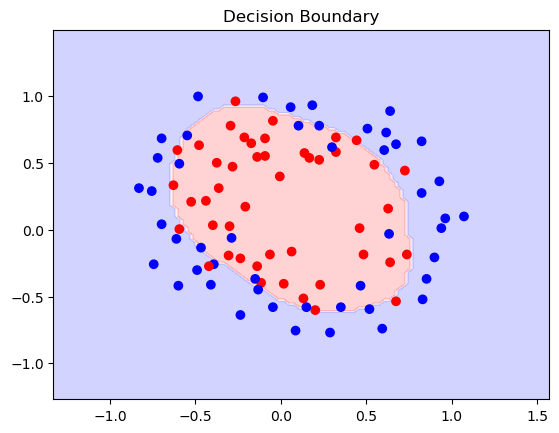

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

def train_and_evaluate(X_train, y_train, X_val, y_val, hidden_layer_sizes=(100,), learning_rate=0.1): # hidden_layer_sizes é uma tupla que define o número de neurônios em cada camada oculta
    # Inicializar a rede neural
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=100, alpha=1e-5, # alpha é um parâmetro de regularização
                        solver='sgd', verbose=1, random_state=42, # random_state é uma semente para a geração de números aleatórios
                        learning_rate_init=learning_rate)
    
    # Treinar a rede neural
    mlp.fit(X_train, y_train)
    
    # Avaliar a precisão da rede neural nos dados de validação
    y_pred = mlp.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

def plot_decision_boundary(X, y, mlp):
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    x1s = np.linspace(x1_min, x1_max, 100)
    x2s = np.linspace(x2_min, x2_max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = mlp.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.title("Decision Boundary")
    plt.show()

# Carregar os dados
data = np.genfromtxt('classification2.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

# Dividir os dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Variar os hiperparâmetros e registrar as métricas de desempenho
hidden_layer_sizes_list = [(50,), (100,), (50, 50), (100, 100)]
learning_rates = [0.01, 0.1, 0.4, 0.5, 0.8, 1.0]

results = []

for hidden_layer_sizes in hidden_layer_sizes_list:
    for learning_rate in learning_rates:
        accuracy = train_and_evaluate(X_train, y_train, X_val, y_val, hidden_layer_sizes, learning_rate)
        results.append((hidden_layer_sizes, learning_rate, accuracy))

# Exibir os resultados
for result in results:
    print("Hidden Layer Sizes:", result[0])
    print("Learning Rate:", result[1])
    print("Accuracy:", result[2])
    print()

# Escolher o melhor modelo (por exemplo, com a maior precisão)
best_result = max(results, key=lambda x: x[2])
best_hidden_layer_sizes = best_result[0]
best_learning_rate = best_result[1]

# Treinar o melhor modelo com todos os dados de treinamento
mlp_best = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes, max_iter=100, alpha=1e-4,
                         solver='sgd', verbose=0, random_state=42, # solver = 'adam' ou 'sgd' ; sgf = stochastic gradient descent ; adam = adaptive moment estimation
                         learning_rate_init=best_learning_rate)
mlp_best.fit(X_train, y_train)

# Plotar a fronteira de decisão do melhor modelo
plot_decision_boundary(X_train, y_train, mlp_best)


___

## (Opcional) Plote as saídas da rede neural para o conjunto de validação (dados estáticos; sem feedback do simulador) e para quando a rede treinada controla o agente no simulador (com feedback). Pode usar plot normal e histograma, por exemplo. Os dois casos diferem?

O seguinte código carrega dados de um arquivo, os prepara para entrada em uma rede neural e, em seguida, treina uma rede neural usando esses dados. Ele usa a biblioteca `scipy` para carregar os dados, `matplotlib` para visualização e `sklearn` para criar e treinar a rede neural. Após o treinamento, ele avalia o desempenho da rede neural calculando sua precisão com base nos dados de teste. Finalmente, ele mostra uma imagem aleatória dos dados com sua etiqueta correspondente.

Este código realiza várias etapas:

1. **Carregamento dos dados:** Carrega os dados de um arquivo chamado "classification3.mat" usando a função `loadmat` da biblioteca SciPy. Os dados são divididos em duas variáveis, X e y.

2. **Pré-processamento:** Não é realizado nenhum pré-processamento explícito, pois os dados já estão prontos para serem usados na rede neural.

3. **Inicialização e treinamento da rede neural:** Utiliza a classe `MLPClassifier` da biblioteca scikit-learn para criar e treinar uma rede neural. Os dados são divididos em conjuntos de treinamento e teste, a rede neural é configurada e treinada com os dados de treinamento.

4. **Avaliação do desempenho da rede neural:** O desempenho da rede neural é avaliado usando os dados de teste, e a precisão é calculada usando a função `accuracy_score` da scikit-learn. O resultado é impresso na tela.

5. **Visualização de um exemplo de imagem de dígito:** Um exemplo aleatório dos dados é escolhido e visualizado usando `matplotlib`. A imagem é exibida em escala de cinza com seu rótulo verdadeiro.

Iteration 1, loss = 1.22190274
Iteration 2, loss = 0.39786749
Iteration 3, loss = 0.30876125
Iteration 4, loss = 0.26188629
Iteration 5, loss = 0.22993335
Iteration 6, loss = 0.20620661
Iteration 7, loss = 0.18245857
Iteration 8, loss = 0.16487841
Iteration 9, loss = 0.14712012
Iteration 10, loss = 0.13184267
Iteration 11, loss = 0.12181552
Iteration 12, loss = 0.11122724
Iteration 13, loss = 0.10086393
Iteration 14, loss = 0.08898692
Iteration 15, loss = 0.08257806
Iteration 16, loss = 0.07374739
Iteration 17, loss = 0.06600173
Iteration 18, loss = 0.06134356
Iteration 19, loss = 0.05590845
Iteration 20, loss = 0.05154355
Iteration 21, loss = 0.04544508
Iteration 22, loss = 0.04241397
Iteration 23, loss = 0.03837113
Iteration 24, loss = 0.03478162
Iteration 25, loss = 0.03300014
Iteration 26, loss = 0.03053398
Iteration 27, loss = 0.02771879
Iteration 28, loss = 0.02669793
Iteration 29, loss = 0.02449707
Iteration 30, loss = 0.02284396
Iteration 31, loss = 0.02152184
Iteration 32, los

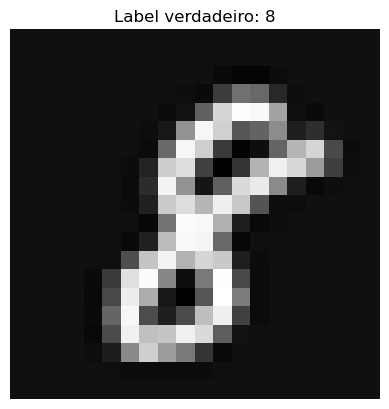

In [7]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

data = loadmat("classification3.mat")
X = data["X"]
y = data["y"].flatten()

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=42,
                    learning_rate_init=0.1)

# Treinar a rede neural
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia da rede neural: {accuracy:.2f}")

index = np.random.randint(0, X.shape[0])
digit_image = X[index].reshape(20, 20).T  # reshape para uma matriz 20x20 e transpor para exibir corretamente
plt.imshow(digit_image, cmap='gray')
plt.title(f"Label verdadeiro: {y[index]}")
plt.axis('off')
plt.show()